**TRACCIA T8 - DI IORIO LUDOVICO - 0336019 - NOTEBOOK 2**

CARICAMENTO DEL MODELLO

In [ ]:
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

# Montiamo Google Drive nel notebook Colab
from google.colab import drive

drive.mount("/content/drive")

!pip install pyyaml h5py

import os
import numpy as np
import keras
import tensorflow as tf

Mounted at /content/drive


In [ ]:
class Autoencoder3(keras.models.Model):
  def __init__(self, latent_shape):
    super(Autoencoder3, self).__init__()

    self.latent_dim = latent_shape[0]*latent_shape[1] # numero di unità del livello completamente connesso (pixel dell'immagine compressa)

    self.encoder = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32, (3,3), strides=2, padding='same', activation='relu', kernel_initializer=keras.initializers.HeNormal()),    #(128x128)x32
            tf.keras.layers.BatchNormalization(),                                                                                                 #(128x128)x32
            tf.keras.layers.Conv2D(64, (3,3), strides=2, padding='same', activation='relu', kernel_initializer=keras.initializers.HeNormal()),    #(64x64)x64
            tf.keras.layers.BatchNormalization(),                                                                                                 #(64x64)x64
            tf.keras.layers.Conv2D(128, (3,3), strides=2, padding='same', activation='relu', kernel_initializer=keras.initializers.HeNormal()),   #(32x32)x128
            tf.keras.layers.BatchNormalization(),                                                                                                 #(32x32)x128
            tf.keras.layers.Conv2D(256, (3,3), strides=2, padding='same', activation='relu', kernel_initializer=keras.initializers.HeNormal()),   #(16x16)x256
            tf.keras.layers.BatchNormalization(),                                                                                                 #(16x16)x256
            tf.keras.layers.Flatten(),                                                                                                            #(16x16x256)x1
            tf.keras.layers.Dense(self.latent_dim, activation='relu', kernel_initializer=keras.initializers.HeNormal())
        ])

    self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(16*16*256, activation='relu', input_shape=(self.latent_dim,), kernel_initializer=keras.initializers.HeNormal()),#(16x16x256)x1
            tf.keras.layers.Reshape((16,16,256)),                                                                                                 #(16x16)x256
            tf.keras.layers.Conv2DTranspose(128, (3,3), strides=2, padding='same', activation='relu'),                                            #(32x32)x128
            tf.keras.layers.BatchNormalization(),                                                                                                 #(32x32)x128
            tf.keras.layers.Conv2DTranspose(64, (3,3), strides=2, padding='same', activation='relu'),                                             #(64x64)x64
            tf.keras.layers.BatchNormalization(),                                                                                                 #(64x64)x64
            tf.keras.layers.Conv2DTranspose(32, (3,3), strides=2, padding='same', activation='relu'),                                             #(128x128)x32
            tf.keras.layers.BatchNormalization(),                                                                                                 #(128x128)x32
            tf.keras.layers.Conv2DTranspose(3, (3,3), strides=2, padding='same', activation='sigmoid')                                            #(256x256)x3
    ])

  def call(self, x):
    encoded = self.encoder(x) # x: dimensione dello spazio latente
    decoded = self.decoder(encoded) # decoded: immagine ricostruita
    return decoded

In [ ]:
latent_shape = (32, 32)
#Autoencoder da aggiungere
model = Autoencoder3(latent_shape)

# Passa un input fittizio per costruire il modello
dummy_input = tf.random.normal((1, 256, 256, 3))  # Dimensioni devono corrispondere ai dati reali
_ = model(dummy_input)  # Questo inizializza i layer

model.load_weights("/content/drive/MyDrive/Colab Notebooks/training/cp-variante2.weights.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CREAZIONE DELLE IMMAGINI:
*   immagini con diversi valori del quality factor: 10,20,...,100
*   Immagini ridimensionata



In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/qualityfactor/image_04486.jpg"
resized_path = "/content/drive/MyDrive/Colab Notebooks/qualityfactor/resized_image_04486.jpg"
qf_path = "/content/drive/MyDrive/Colab Notebooks/qualityfactor/image_04486{quality}.jpg"

In [ ]:
#IMMAGINE RIDIMENSIONATA
img = Image.open(image_path)

resized_image = img.resize((256, 256))
resized_image.save(resized_path)

In [ ]:
#IMMAGINI CON DIVERSI QUALITI' FACTOR
def generate_images(img):
  q = 0
  for i in range(10, 101, 10):
    img.save(qf_path.format(quality=q), format="JPEG", quality=i)
    q = q + 1

generate_images(img)

# ***CONFRONTO TRA IMMAGINE ORIGINALE E LE IMMAGINI CON I DIVERSI VALORI DEL QUALITY FACTOR***

In [ ]:
# Dimensione dell'immagine originale
original_image_size = os.path.getsize(image_path)

qf_images_size = []
for i in range(10):
  qf_images_size.append(os.path.getsize(qf_path.format(quality=i)))

print("Dimensione dell'immagine originale : ", original_image_size, "byte\n")
for i in range(10):
  print("Dimensione dell'immagine quality factor", str((i+1)*10), ": ", qf_images_size[i], "byte")

Dimensione dell'immagine originale :  66580 byte

Dimensione dell'immagine quality factor 10 :  17324 byte
Dimensione dell'immagine quality factor 20 :  26047 byte
Dimensione dell'immagine quality factor 30 :  34533 byte
Dimensione dell'immagine quality factor 40 :  37334 byte
Dimensione dell'immagine quality factor 50 :  48441 byte
Dimensione dell'immagine quality factor 60 :  58359 byte
Dimensione dell'immagine quality factor 70 :  64270 byte
Dimensione dell'immagine quality factor 80 :  70453 byte
Dimensione dell'immagine quality factor 90 :  94898 byte
Dimensione dell'immagine quality factor 100 :  221373 byte


In [ ]:
#conversione in numpy array

#immagine originale
img = np.array(Image.open(image_path))

#immagini con diversi qf
qf_images = np.array([np.array(Image.open(qf_path.format(quality=i))) for i in range(10)])

***SSIM***

In [ ]:
from tensorflow import image

# Funzione che la ricostruzione delle immagini usando la metrica SSIM
def evaluate(img1, img2):
  img1 = tf.cast(img1, tf.float32)  # Converti img1 in uint8
  img2 = tf.cast(img2, tf.float32)  # Converti img2 in uint8
  ret = image.ssim(img1, img2, max_val=1.0)
  ssim_mean = tf.reduce_mean(ret)
  ssim_variance = tf.math.reduce_variance(ret)

  return ssim_mean, ssim_variance

In [ ]:
for i in range(len(qf_images)):
  ssim_mean, ssim_variance = evaluate(img, qf_images[i])
  print("QUALITY FACTOR " + str((i+1)*10) + " -> " + "SSIM: " + str(ssim_mean.numpy()))

QUALITY FACTOR 10 -> SSIM: 0.50647914
QUALITY FACTOR 20 -> SSIM: 0.6277067
QUALITY FACTOR 30 -> SSIM: 0.7039797
QUALITY FACTOR 40 -> SSIM: 0.72767067
QUALITY FACTOR 50 -> SSIM: 0.7721
QUALITY FACTOR 60 -> SSIM: 0.86882514
QUALITY FACTOR 70 -> SSIM: 0.9441943
QUALITY FACTOR 80 -> SSIM: 0.94932264
QUALITY FACTOR 90 -> SSIM: 0.9617024
QUALITY FACTOR 100 -> SSIM: 0.97332007


***RAPPORTO DI COMPRESSIONE***


In [ ]:
for i in range(len(qf_images_size)):
  print("quality factor " + str((i+1)*10) + " -> COMP. RATE: " + str(qf_images_size[i]/original_image_size))

quality factor 10 -> COMP. RATE: 0.26019825773505556
quality factor 20 -> COMP. RATE: 0.3912135776509462
quality factor 30 -> COMP. RATE: 0.5186692700510663
quality factor 40 -> COMP. RATE: 0.5607389606488435
quality factor 50 -> COMP. RATE: 0.7275608290778012
quality factor 60 -> COMP. RATE: 0.8765244818263743
quality factor 70 -> COMP. RATE: 0.9653048963652748
quality factor 80 -> COMP. RATE: 1.0581706218083509
quality factor 90 -> COMP. RATE: 1.4253229197957344
quality factor 100 -> COMP. RATE: 3.3249173926103937


# ***CONFRONTO TRA IMMAGINE ORIGINALE E IMMAGINE RICOSTRUITA***

In [ ]:
# Dimensione dell'immagine originale
original_image_size = os.path.getsize(image_path)

# Dimensione dell'immagine ridimensionata
resized_image_size = os.path.getsize(resized_path)

print("Dimensione dell'immagine originale : ", original_image_size, "byte\n")
print("Dimensione dell'immagine ridimensionata : ", resized_image_size, "byte\n")

Dimensione dell'immagine originale :  66580 byte

Dimensione dell'immagine ridimensionata :  18109 byte



In [ ]:
#immagine ridimensionata
resized_image = np.array(Image.open(resized_path)) / 255.0
reshaped_image = resized_image.reshape(1, 256, 256, 3)

# Generazione delle immagini compresse
encoded_imgs = model.encoder.predict(reshaped_image)

# Ricostruzione delle immagini
decoded_imgs = model.decoder.predict(encoded_imgs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


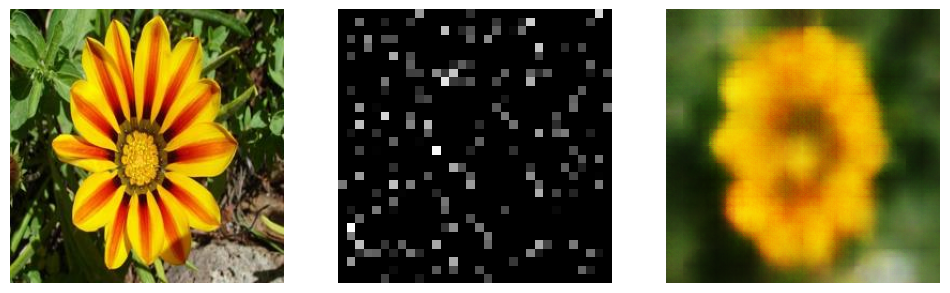

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
images = [resized_image, encoded_imgs, decoded_imgs]
ax = axes[0]
ax.imshow(resized_image)
ax.axis('off')
ax = axes[1]
ax.imshow(encoded_imgs.reshape(latent_shape))
ax.axis('off')
ax = axes[2]
ax.imshow(decoded_imgs[0])
ax.axis('off')

plt.show()

***SSIM***

In [ ]:
ssim_mean, ssim_variance = evaluate(resized_image, decoded_imgs)
print("SSIM: " + str(ssim_mean.numpy()))

SSIM: 0.2500395


***RAPPORTO DI COMPRESSIONE***

In [4]:
latent_size = encoded_imgs.nbytes
rc = latent_size/resized_image_size
print("compression rate: " + str(rc))

compression rate: 0.22618587442708046
